In [8]:
# Appendix II

import keras
from keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')
model.summary()  # As a reminder.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 128)     

In [11]:
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
from keras.preprocessing import image
import numpy as np

img_path = 'lion_Africa.jpeg'

# We preprocess the image into a 4D tensor

img = load_img(img_path, target_size=(150, 150))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


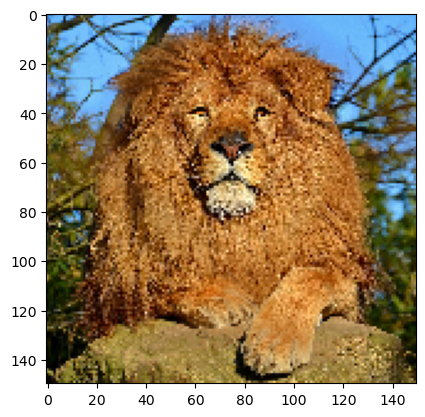

In [12]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [13]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [14]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 40ms/step


In [15]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


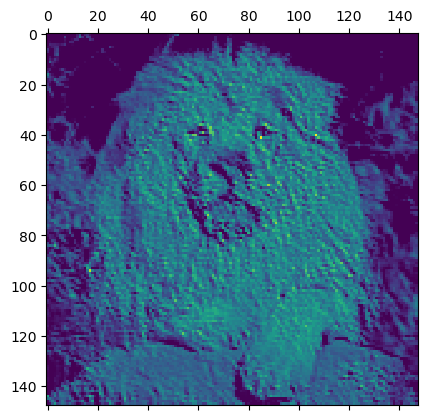

In [16]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

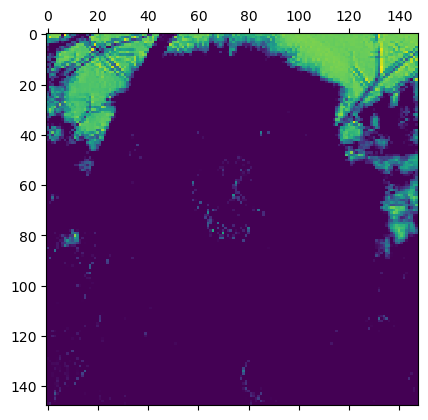

In [17]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

In [18]:
# Function to plot activations
def plot_activation(activations, layer_name, channel_indices):
    fig, axes = plt.subplots(1, len(channel_indices), figsize=(20, 5))
    fig.suptitle(f'Activations of {layer_name}')
    for ax, channel_index in zip(axes, channel_indices):
        ax.matshow(activations[:, :, channel_index], cmap='viridis')
        ax.axis('off')
    plt.show()

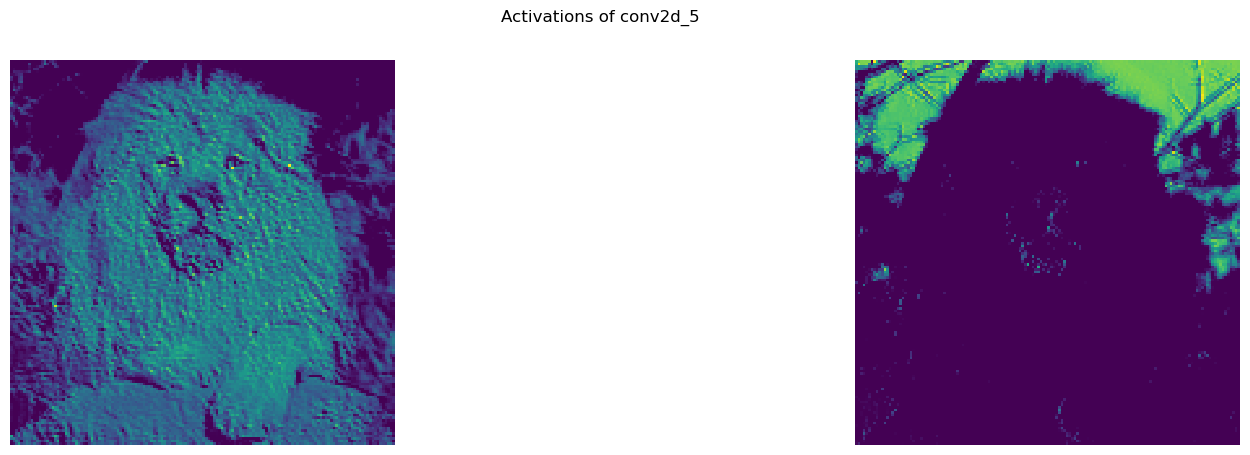

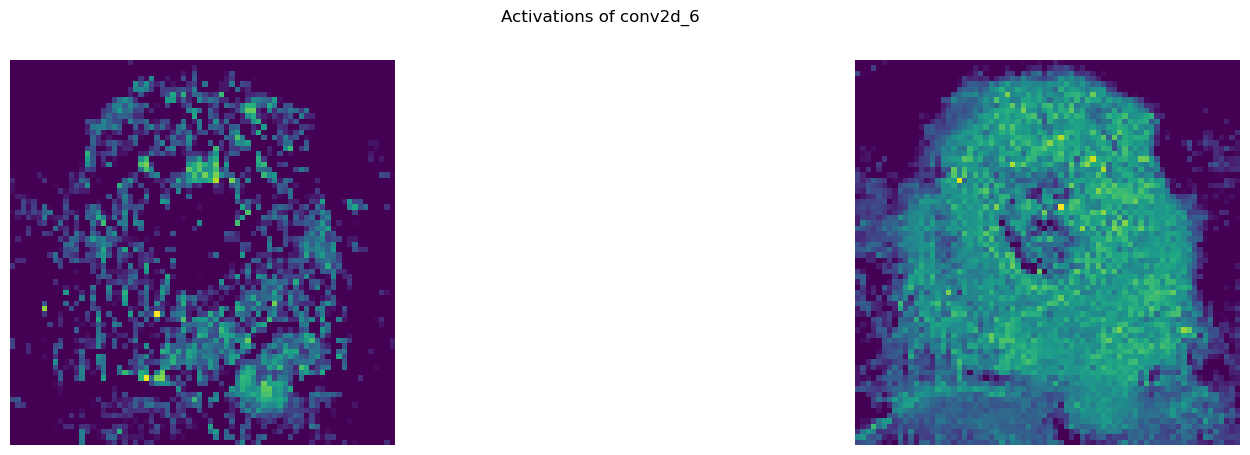

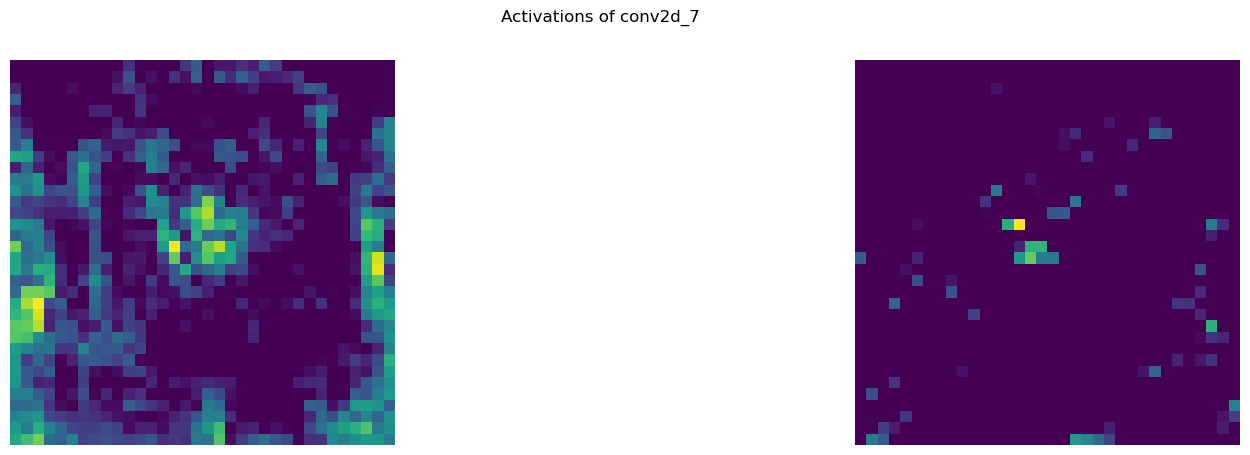

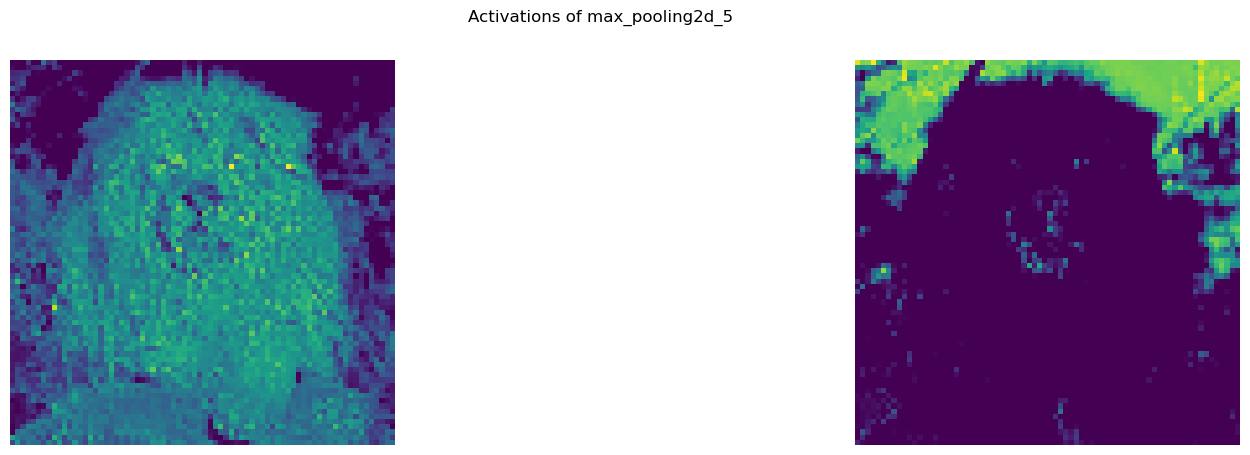

In [19]:
# Visualize activations for the first convnet layer (index 0) for channels 3 and 30
first_layer_activation = activations[0]
plot_activation(first_layer_activation[0], model.layers[0].name, [3, 30])

# Select two other convolutional layers and one MaxPooling layer
# Assuming the 3rd and 5th layers are convolutional layers and the 2nd layer is a MaxPooling layer
conv_layer_indices = [2, 4]
pool_layer_index = 1

# Visualize activations for these layers
for layer_index in conv_layer_indices:
    layer_activation = activations[layer_index]
    plot_activation(layer_activation[0], model.layers[layer_index].name, [3, 30])

# Visualize activations for the MaxPooling layer
pool_layer_activation = activations[pool_layer_index]
plot_activation(pool_layer_activation[0], model.layers[pool_layer_index].name, [3, 30])


/var/folders/2x/j2yg_98j10n2xd364kzb8nvm0000gn/T/ipykernel_91898/3924288684.py:28: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()


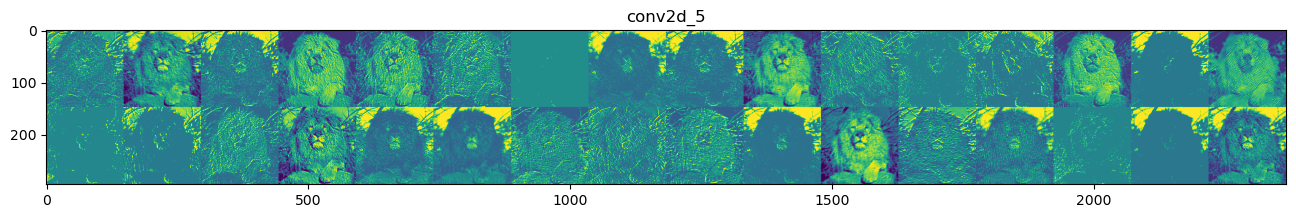

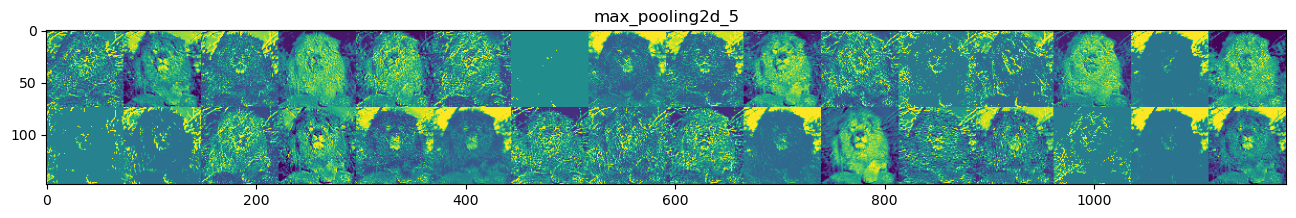

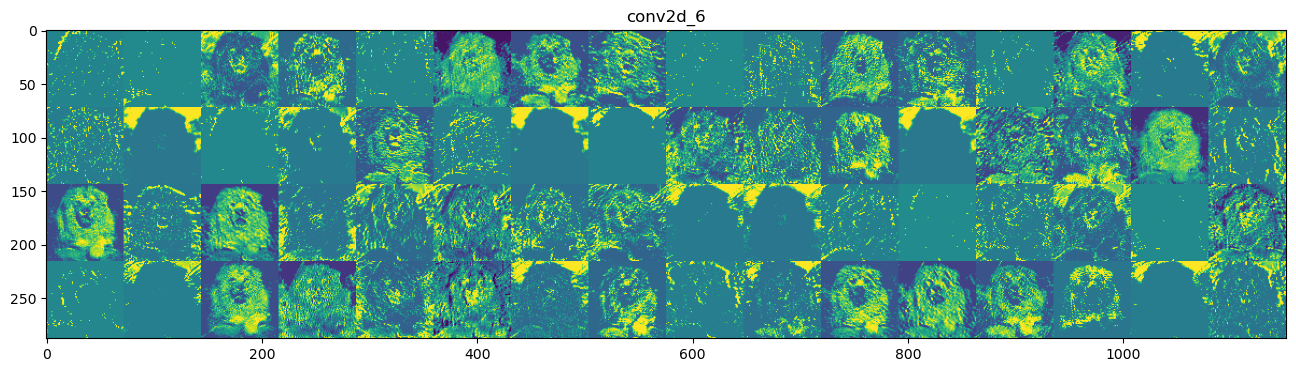

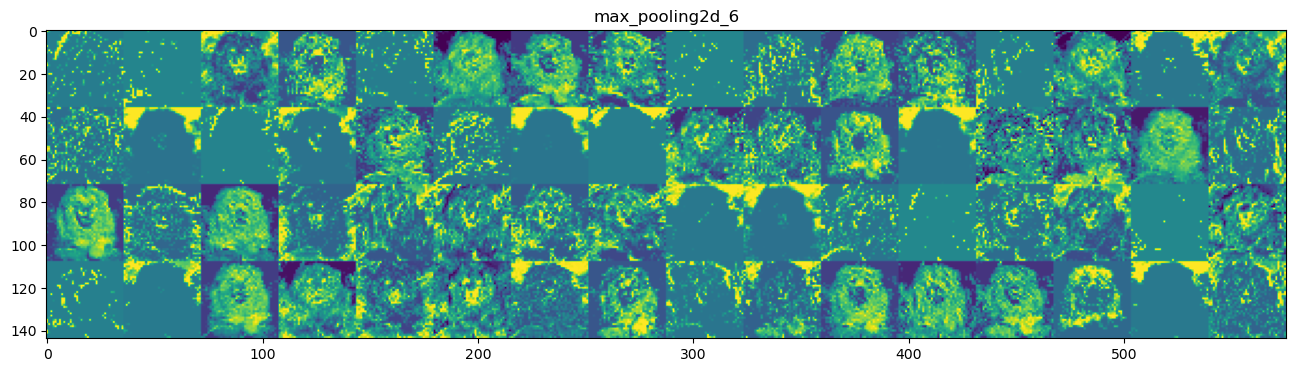

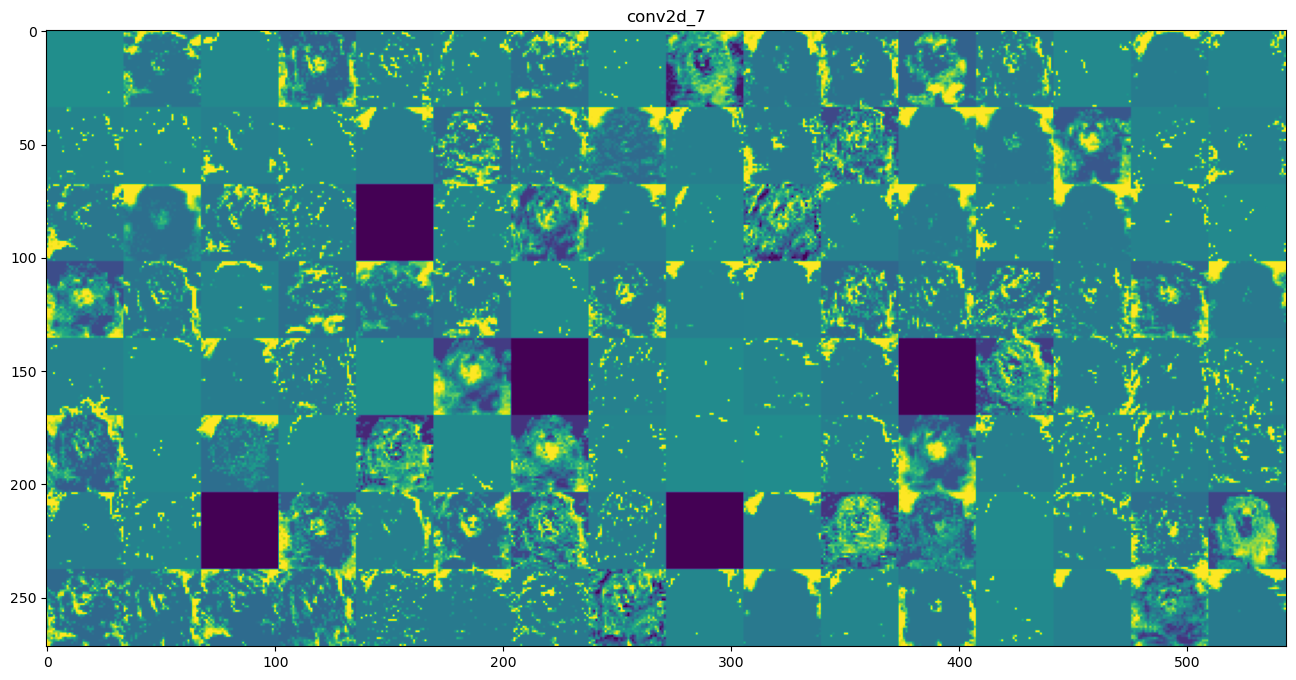

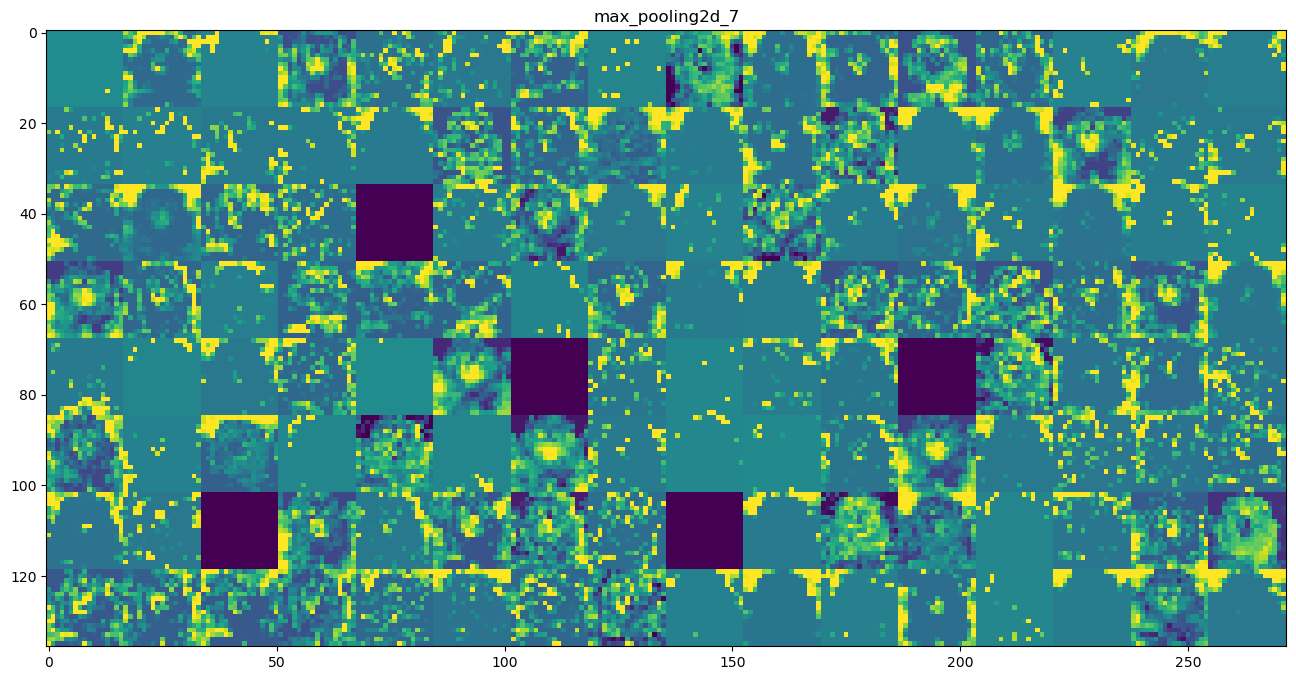

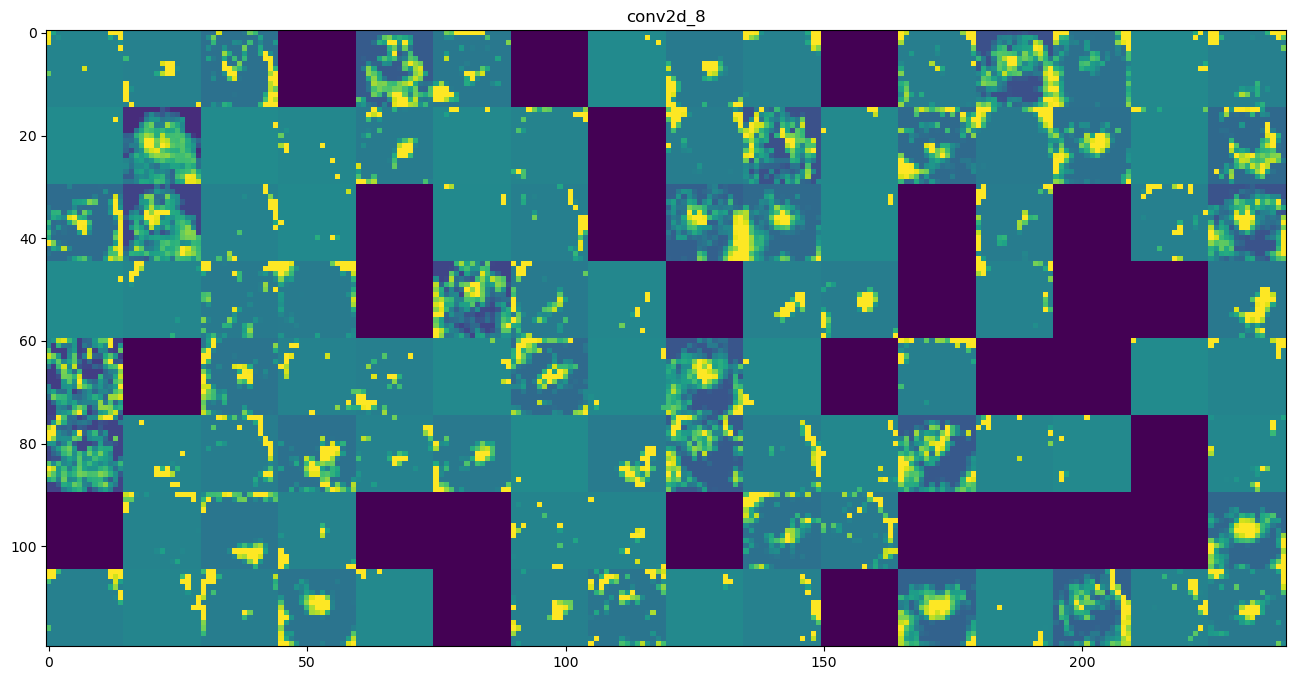

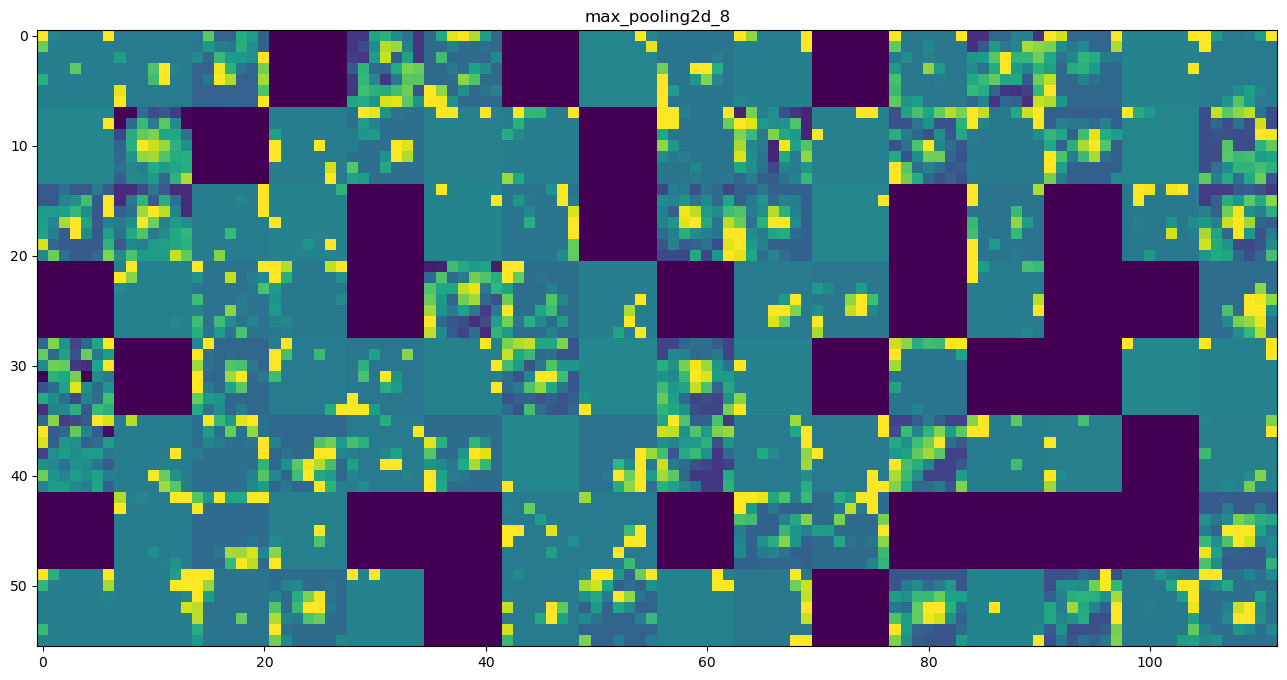

In [20]:
# Layer names to be used in plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Display feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    
    # Number of features and size of the feature map
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]

    # Tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # Tile each filter into horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            
            # Post-process feature so it displays ok
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Plot the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()